<a href="https://colab.research.google.com/github/ko-syo-noyome/OpenCV-lesson/blob/main/%E7%94%BB%E5%83%8F%E3%81%AE%E5%85%A5%E5%87%BA%E5%8A%9B%E3%83%BB%E8%A1%A8%E7%A4%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#https://algorithm.joho.info/programming/python-opencv-cv2-imread/#toc2
from google.colab import files
uploadrd=files.upload()

Saving 001.JPG to 001.JPG


*google* colabに写真を入れとく必要がある。

<h1>1.画像の読み込み</h1>

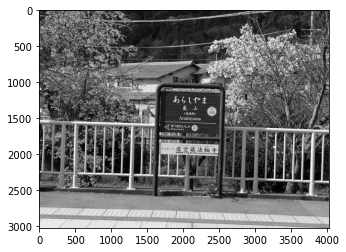

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread("001.JPG",0)

# グレースケール変換
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 平均値フィルタでぼかし
dst = cv2.blur(img, ksize=(3,3))

# 結果を出力
#cv2.imshow("mc", img)
plt.imshow(dst, cmap="gray")


<h1>2.画像の書き込み</h1>

In [ ]:
import cv2
import numpy as np


# 画像の読み込み(RGB)
# img = cv2.imread("001.JPG")

# 三次元配列(カラー)
img2 = np.array([[[36, 28, 237], [ 76, 177, 34], [204, 72, 63]],
                     [[0, 0 ,0], [255, 255, 255], [195, 195, 195]],
                     [[164, 73, 163], [ 36, 28, 237], [0, 0, 0]]])

# 二次元配列（グレースケール）
gray = np.array([[138, 142, 98],
                 [0, 255, 195],
                 [120, 138, 0]])

# 画像ファイルに出力
cv2.imwrite("output1.jpg", img)
cv2.imwrite("output2.jpg", img2)
cv2.imwrite("output3.jpg", gray)

True

windosは[blue Green Red]の順に表示される。



**まとめ**

imread関数

・第一引数

*   画像ファイルのパス

・第二引数

1.   cv2.IMREAD_COLOR or 1を指定する場合 : (画像をカラー(RGB)で読み込む。 第二引数を指定しない場合にも選ばれる。デフォルト。)
2.   cv2.IMREAD_UNCHANGED or -1を指定する場合 : (画像をカラー(RGB)に透過度を加えた形式(RGBA)
1.   cv2.IMREAD_GRAYSCALE or 0を指定する場合 : (画像をグレースケールで読み込む。)









  




<h1>4.画像の高さ・幅・チャンネル数・画素数を取得</h1>

In [ ]:
import cv2
import numpy as np

# img = cv2.imread("mc.png",1)

height, width, ch = img.shape


# 画素数 = 幅 * 高さ
size = width * height

# 情報表示
print("幅：", width)
print("高さ：", height)
print("チャンネル数:", ch)
print("画素数:", size)   
print("データ型：", img.dtype)

# 1chずつ表示
print("Bの画素値：\n", img[:,:,0])
print("Gの画素値：\n", img[:,:,1])
print("Rの画素値：\n", img[:,:,2])

幅： 4032
高さ： 3024
チャンネル数: 3
画素数: 12192768
データ型： uint8
Bの画素値：
 [[ 74 107 138 ...  37  34  30]
 [ 59  99 142 ...  36  36  33]
 [ 44  88 135 ...  34  36  35]
 ...
 [225 225 225 ... 110 109 108]
 [224 224 223 ...  97  96  95]
 [225 224 223 ...  95  93  93]]
Gの画素値：
 [[ 76 109 140 ...  48  48  44]
 [ 61 101 144 ...  47  50  47]
 [ 46  90 137 ...  45  50  49]
 ...
 [231 231 231 ... 118 117 116]
 [232 232 231 ... 105 104 103]
 [233 232 231 ... 103 101 101]]
Rの画素値：
 [[ 77 110 141 ...  46  44  40]
 [ 62 102 145 ...  45  46  43]
 [ 47  91 138 ...  43  46  45]
 ...
 [226 226 226 ... 125 124 123]
 [225 225 224 ... 112 111 110]
 [226 225 224 ... 110 108 108]]


<h1>5.グレースケール変換</h1>

Method 1

In [ ]:
# グレースケール変換   
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
# グレースケール画像の書き込み
# cv2.imwrite("C:\prog\python\gray.png", gray)


# BGR, B, G, R, Grayの2次元配列を確認
print("BGR=", img)
print("-------------")

print("Blue=", img[:,:,0])
print("-------------")

print("Green=", img[:,:,1])
print("-------------")

print("Red=", img[:,:,2])
print("-------------")
print("gray=", gray)

Method 2

In [ ]:
def rgb_to_gray(src):
     # チャンネル分解
     b, g, r = src[:,:,0], src[:,:,1], src[:,:,2]

     # R, G, Bの値からGrayの値に変換（float型 → 符号なし8bit整数型に変換）
     return np.array(0.2989 * r + 0.5870 * g + 0.1140 * b, dtype='uint8')
    
# グレースケール変換   
gray = rgb_to_gray(img)
    
# グレースケール画像の書き込み
#cv2.imwrite("C:\prog\python\gray.png", gray)


# BGR, B, G, R, Grayの2次元配列を確認
print("BGR=", img)
print("-------------")

print("Blue=", img[:,:,0])
print("-------------")

print("Green=", img[:,:,1])
print("-------------")

print("Red=", img[:,:,2])
print("-------------")
print("gray=", gray)

RGB画像をグレースケール画像に変換する式

Gray = Red * 0.3 + Green * 0.59 + Blue*0.11

<h1>6.HSV色空間に変換</h1>

HSV色空間とは、「色相(Hue)」「彩度(Saturation)」「明度(Value)」の3つの組み合わせで色を表現する手法です。
HSV色空間は人間が色を知覚する方法と類似しているため、RGB色空間よりも人がイメージした通りの色を作りやすいという特徴があります。
この特徴から、画像処理でも色検出をおこなう場合などにHSV色空間が利用されています。

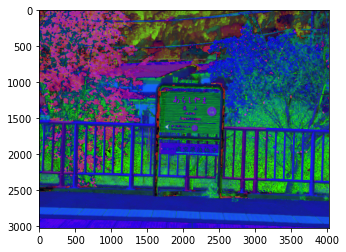

In [10]:
import cv2
import numpy as np


# 入力画像の読み込み
img = cv2.imread("001.JPG")

# 方法2(OpenCVで実装)       
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
# 結果を出力
cv2.imwrite("C:\prog\python\\test\hsv.jpg", hsv)
plt.imshow(hsv)

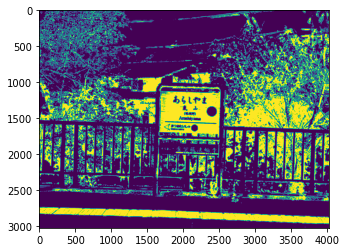

In [12]:
import cv2
import numpy as np

# 赤色の検出
def detect_red_color(img):
    # HSV色空間に変換
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 赤色のHSVの値域1
    hsv_min = np.array([0,64,0])
    hsv_max = np.array([30,255,255])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    # 赤色のHSVの値域2
    hsv_min = np.array([150,64,0])
    hsv_max = np.array([179,255,255])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)

    # 赤色領域のマスク（255：赤色、0：赤色以外）    
    mask = mask1 + mask2

    # マスキング処理
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    return mask, masked_img

# 緑色の検出
def detect_green_color(img):
    # HSV色空間に変換
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 緑色のHSVの値域1
    hsv_min = np.array([30, 64, 0])
    hsv_max = np.array([90,255,255])

    # 緑色領域のマスク（255：赤色、0：赤色以外）    
    mask = cv2.inRange(hsv, hsv_min, hsv_max)
    
    # マスキング処理
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    return mask, masked_img

# 青色の検出
def detect_blue_color(img):
    # HSV色空間に変換
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 青色のHSVの値域1
    hsv_min = np.array([90, 64, 0])
    hsv_max = np.array([150,255,255])

    # 青色領域のマスク（255：赤色、0：赤色以外）    
    mask = cv2.inRange(hsv, hsv_min, hsv_max)

    # マスキング処理
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    return mask, masked_img


# 入力画像の読み込み
# img = cv2.imread("C:\prog\python\\test\input.png")

# 色検出（赤、緑、青）
red_mask, red_masked_img = detect_red_color(img)
# green_mask, green_masked_img = detect_green_color(img)
# blue_mask, blue_masked_img = detect_blue_color(img)

# 結果を出力
# cv2.imwrite("C:\prog\python\\test\\red_mask.png", red_mask)
# cv2.imwrite("C:\prog\python\\test\\red_masked_img.png", red_masked_img)
# cv2.imwrite("C:\prog\python\\test\green_mask.png", green_mask)
# cv2.imwrite("C:\prog\python\\test\green_masked_img.png", green_masked_img)
# cv2.imwrite("C:\prog\python\\test\\blue_mask.png", blue_mask)
# cv2.imwrite("C:\prog\python\\test\\blue_masked_img.png", blue_masked_img)
plt.imshow(red_mask)
#plt.imshow(red_masked_img)
